## Step 1: Analyze the Data Using Visualizations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
type
1    41
2    

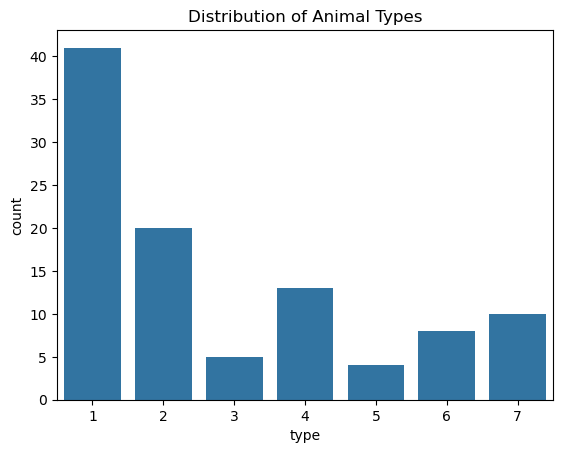

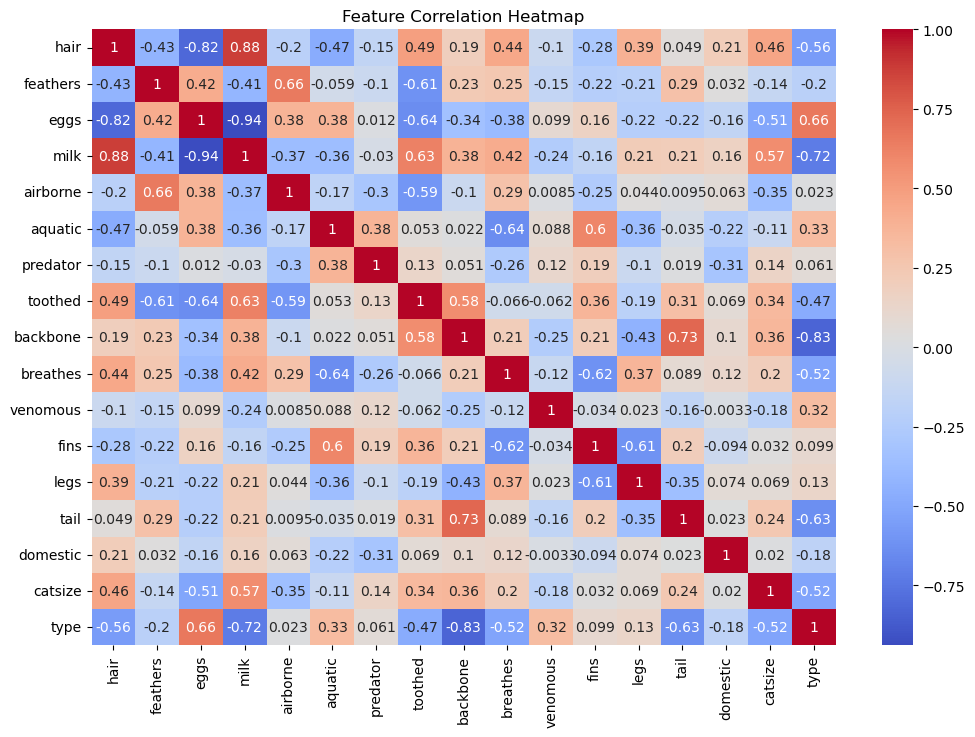

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"D:\Excelr\Assignments\KNN\Zoo.csv")

# Quick overview
print(df.info())
print(df['type'].value_counts())

# Visualize class distribution
sns.countplot(data=df, x='type')
plt.title('Distribution of Animal Types')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['animal name']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


##  Step 2: Preprocess the Data

In [5]:
# Check for missing values
print(df.isnull().sum())

# No missing values usually in this dataset. Outlier detection isn't very relevant for binary features.

# Drop 'animal name' as it's not a predictive feature
df = df.drop(columns=['animal name'])


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


##  Step 3: Split Dataset (80/20)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4 & 5: Implement KNN and Choose K, Metric

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Try k=5 with Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

## Step 6: Evaluate the Classifier

In [16]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048
Precision (macro): 0.75
Recall (macro): 0.8194444444444443
F1 Score (macro): 0.7705314009661836

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

## Step 7: Visualize Decision Boundaries (with PCA)

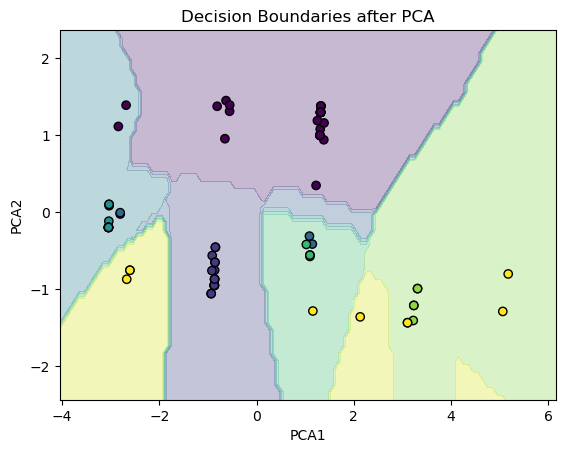

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)

import numpy as np

# Meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k')
plt.title('Decision Boundaries after PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
